#Задание 1. Анализ данных в Python (pandas и numpy)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###A. Загрузка и первичный обзор

In [4]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
print('Первые пять строк датасета:\n\n', df.head(5),'\n\n')
print('\nПоследние пять строк датасета:\n\n', df.tail(5),  '\n\n')
print('\nИнформация о датасете:\n')
df.info()
print('\n\n\nТипы данных датасета:\n\n', df.dtypes)
print('Типы данных корректны')

print('Описательная статистика:\n\n', df.describe(include = 'all'))
print('\nЧисло уникальных значений:\n', df.nunique().sort_values(ascending = False))

Первые пять строк датасета:

    Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1   

###B. Обработка данных

####1.Пропущенные значения

In [ ]:
print('Количество пропусков по столбцам:\n\n',df.isna().sum())

Количество пропусков по столбцам:

 Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             218
dtype: int64


Пропуски присутствуют только в последнем столбце. Заполняем их значением 'Norm', так как отсутствие информации о проблемах со сном предполагает нормальный сон.

In [ ]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('Norm')
print('Количество пропусков по столбцам:\n\n',df.isna().sum())

Количество пропусков по столбцам:

 Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


####2.Дубликаты

In [ ]:
print('Количество дубликатов: ',df.duplicated().sum())
print('Дубликаты отсутствуют')

Количество дубликатов:  0
Дубликаты отсутствуют


####3.Выбросы

Проверим наличие выбросов для столбцов Age, Physical Activity Level, Daily Steps, Sleep Duration:

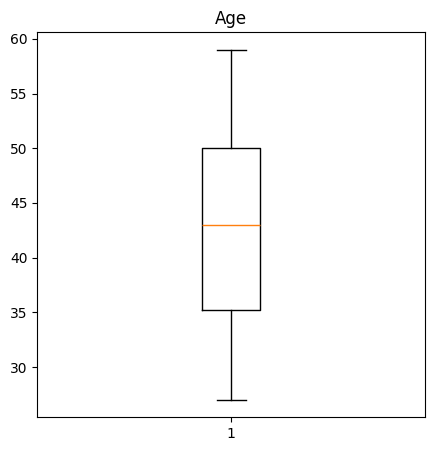

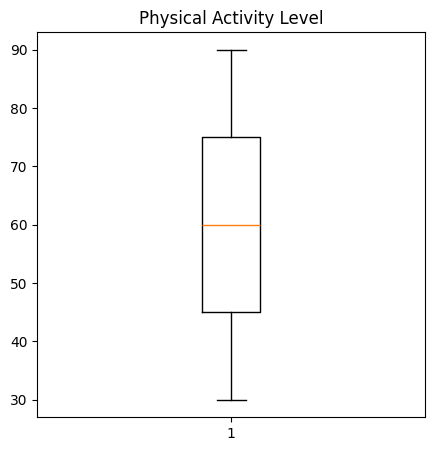

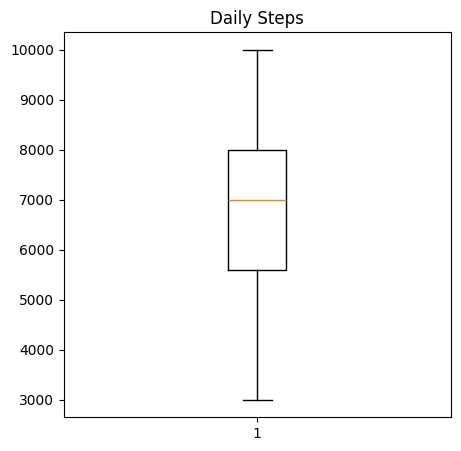

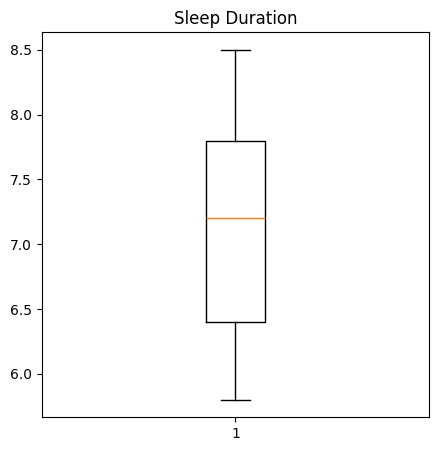


Выбросов нет


In [ ]:
cat = ('Age','Physical Activity Level','Daily Steps', 'Sleep Duration',)
for i in cat:
  plt.figure(figsize=(5, 5))
  plt.boxplot(x=df[i])
  plt.title(i)
  plt.show()

print('\nВыбросов нет')

###C. Визуализация данных

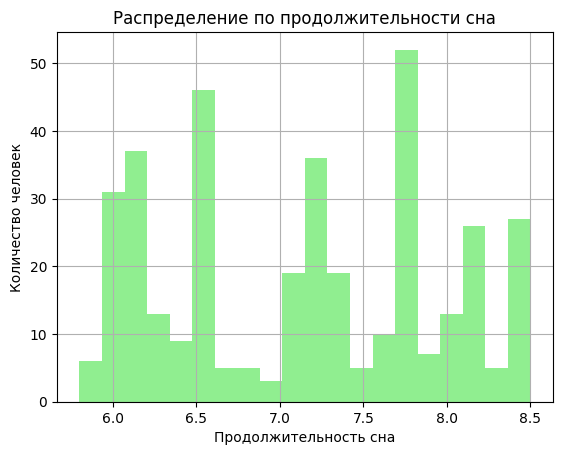

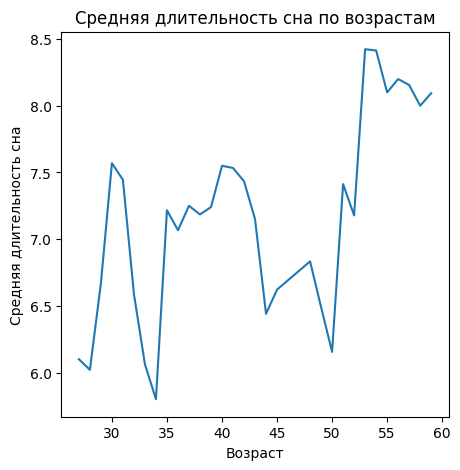

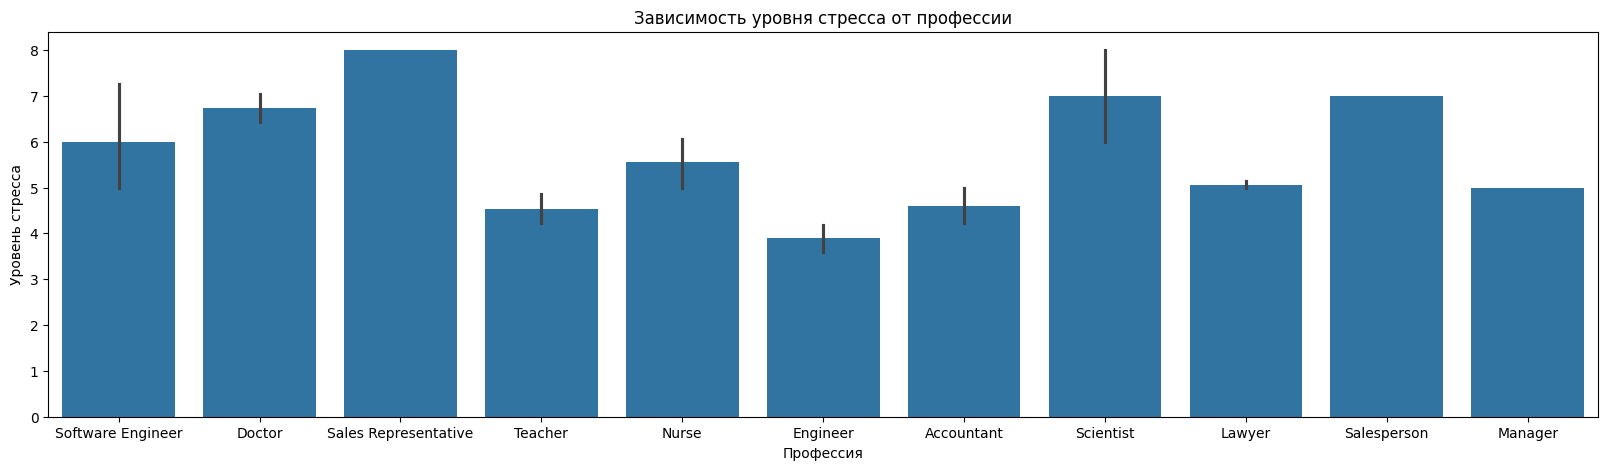

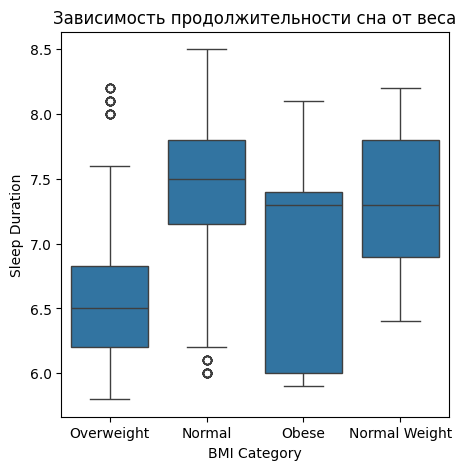

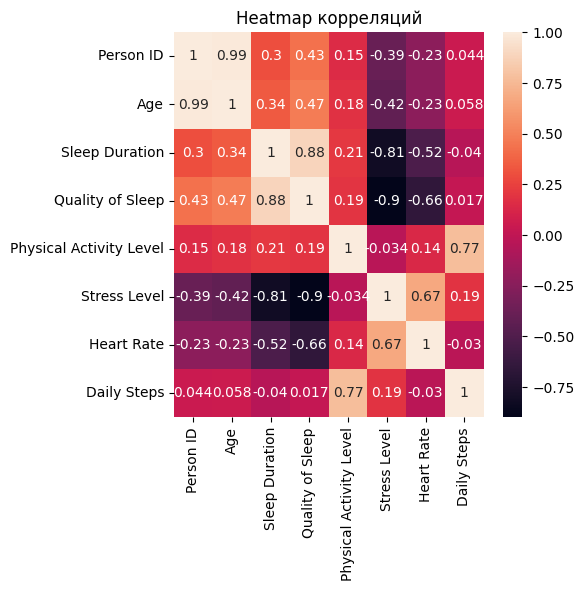

In [ ]:
# График №1
df['Sleep Duration'].hist(bins=20, color='lightgreen')
plt.title("Распределение по продолжительности сна")
plt.xlabel("Продолжительность сна")
plt.ylabel("Количество человек")
plt.show()
# График №2
age_sleep = df.groupby('Age')['Sleep Duration'].mean()
plt.figure(figsize=(5, 5))
plt.plot(age_sleep.index, age_sleep.values)
plt.title('Средняя длительность сна по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Средняя длительность сна')
plt.show()
# График №3
plt.figure(figsize=(20, 5))
sns.barplot(x = df['Occupation'], y = df['Stress Level'])
plt.title("Зависимость уровня стресса от профессии")
plt.xlabel("Профессия")
plt.ylabel("Уровень стресса")
plt.show()
# График №4
plt.figure(figsize=(5, 5))
sns.boxplot(x = df['BMI Category'], y = df['Sleep Duration'])
plt.title('Зависимость продолжительности сна от веса')
plt.show()

# График №5
cor = df.corr(numeric_only=True)
plt.figure(figsize = (5,5))
sns.heatmap(cor, annot=True)
plt.title('Heatmap корреляций')
plt.show()

###D.Группировки и агрегации

In [5]:
df.groupby('Occupation')['Sleep Duration'].agg(['mean', 'median']).sort_values('mean', ascending=False)
df['Sleep Disorder'].fillna('None').value_counts()
df.groupby("Gender").agg({'Stress Level': 'mean', 'Daily Steps': 'mean', 'Heart Rate': 'mean'})
pd.pivot_table(
    df,
    index='BMI Category',
    columns='Gender',
    values='Quality of Sleep',
    aggfunc='mean'
)

Gender,Female,Male
BMI Category,,
Normal,8.500000,7.251908
Normal Weight,7.285714,7.714286
Obese,7.000000,6.333333
Overweight,7.216981,6.095238
